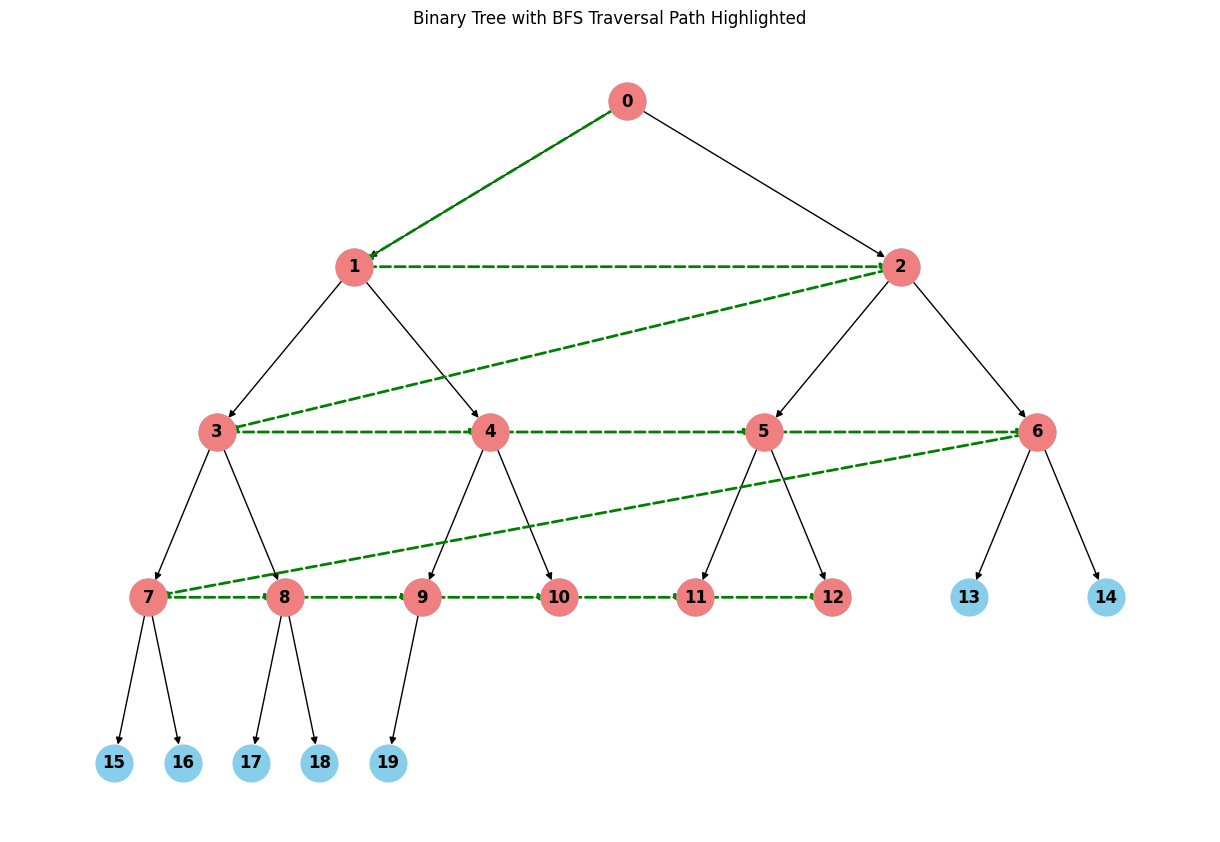

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def generate_binary_tree(nodes):
    G = nx.DiGraph()  # Use a directed graph to represent parent-child relationships
    for i in range(nodes):
        left_child = 2 * i + 1
        right_child = 2 * i + 2
        if left_child < nodes:
            G.add_edge(i, left_child)
        if right_child < nodes:
            G.add_edge(i, right_child)
    return G

def hierarchical_layout(G, root=0, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = {root: (xcenter, vert_loc)}

    def add_edges(node, x, y, dx):
        neighbors = list(G.neighbors(node))
        if neighbors:
            next_x = x - dx / 2
            for neighbor in neighbors:
                pos[neighbor] = (next_x, y - vert_gap)
                add_edges(neighbor, next_x, y - vert_gap, dx / 2)
                next_x += dx

    add_edges(root, xcenter, vert_loc, width)
    return pos

def bfs_full_path(G, start, end):
    visited = set()
    queue = deque([start])
    parent = {start: None}
    full_path = []

    while queue:
        node = queue.popleft()
        visited.add(node)
        full_path.append(node)

        if node == end:
            break

        for neighbor in G.neighbors(node):
            if neighbor not in visited and neighbor not in queue:
                queue.append(neighbor)
                parent[neighbor] = node

    return full_path

def draw_graph_with_bfs(G, path):
    pos = hierarchical_layout(G, root=0, width=1.0, vert_gap=0.2, vert_loc=1, xcenter=0.5)  # Root at the center top
    plt.figure(figsize=(12, 8))

    # Draw the entire graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold", edge_color="black")

    # Highlight the BFS traversal path
    path_edges = list(zip(path, path[1:]))  # Create a list of edges for the path
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="green", width=2, style="dashed")
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="lightcoral", node_size=700)

    plt.title("Binary Tree with BFS Traversal Path Highlighted")
    plt.show()

# Generate a binary tree with 20 nodes
binary_tree = generate_binary_tree(nodes=20)

# Perform BFS from node 0 to node 12 and visualize the traversal path
bfs_traversal_path = bfs_full_path(binary_tree, start=0, end=12)
draw_graph_with_bfs(binary_tree, bfs_traversal_path)

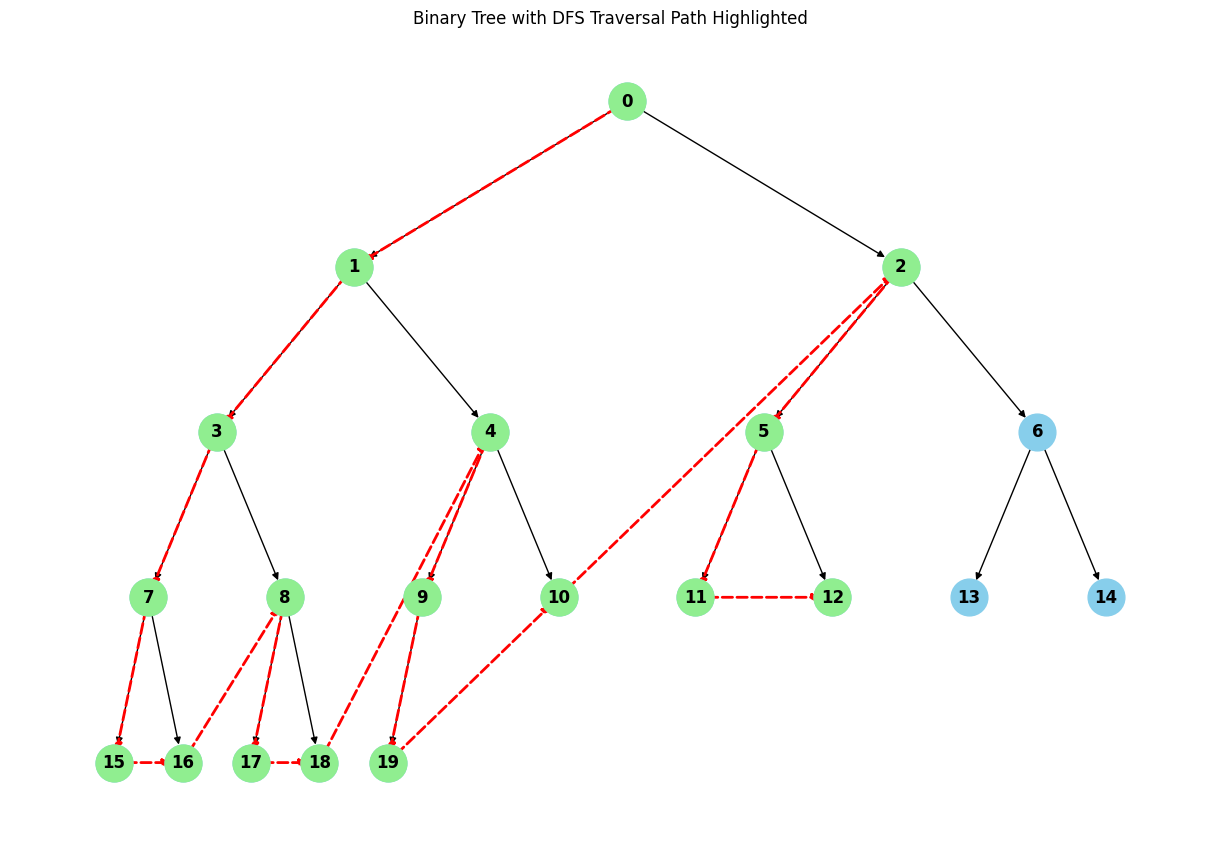

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_binary_tree(nodes):
    G = nx.DiGraph()  # Use a directed graph to represent parent-child relationships
    for i in range(nodes):
        left_child = 2 * i + 1
        right_child = 2 * i + 2
        if left_child < nodes:
            G.add_edge(i, left_child)
        if right_child < nodes:
            G.add_edge(i, right_child)
    return G

def hierarchical_layout(G, root=0, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = {root: (xcenter, vert_loc)}

    def add_edges(node, x, y, dx):
        neighbors = list(G.neighbors(node))
        if neighbors:
            next_x = x - dx / 2
            for neighbor in neighbors:
                pos[neighbor] = (next_x, y - vert_gap)
                add_edges(neighbor, next_x, y - vert_gap, dx / 2)
                next_x += dx

    add_edges(root, xcenter, vert_loc, width)
    return pos

def dfs_path(G, start, end):
    visited = set()
    path = []
    full_path = []

    def dfs(node):
        visited.add(node)
        path.append(node)
        full_path.append(node)
        if node == end:
            return True
        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                if dfs(neighbor):
                    return True
        path.pop()  # Backtrack if the end is not found along this path
        return False

    dfs(start)
    return full_path

def draw_graph_with_dfs(G, path):
    pos = hierarchical_layout(G, root=0, width=1.0, vert_gap=0.2, vert_loc=1, xcenter=0.5)  # Root at the center top
    plt.figure(figsize=(12, 8))

    # Draw the entire graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold", edge_color="black")

    # Highlight the DFS traversal path
    path_edges = list(zip(path, path[1:]))  # Create a list of edges for the path
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2, style="dashed")
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="lightgreen", node_size=700)

    plt.title("Binary Tree with DFS Traversal Path Highlighted")
    plt.show()

# Generate a binary tree with 20 nodes
binary_tree = generate_binary_tree(nodes=20)

# Perform DFS from node 0 to node 12 and visualize the traversal path
dfs_traversal_path = dfs_path(binary_tree, start=0, end=12)
draw_graph_with_dfs(binary_tree, dfs_traversal_path)

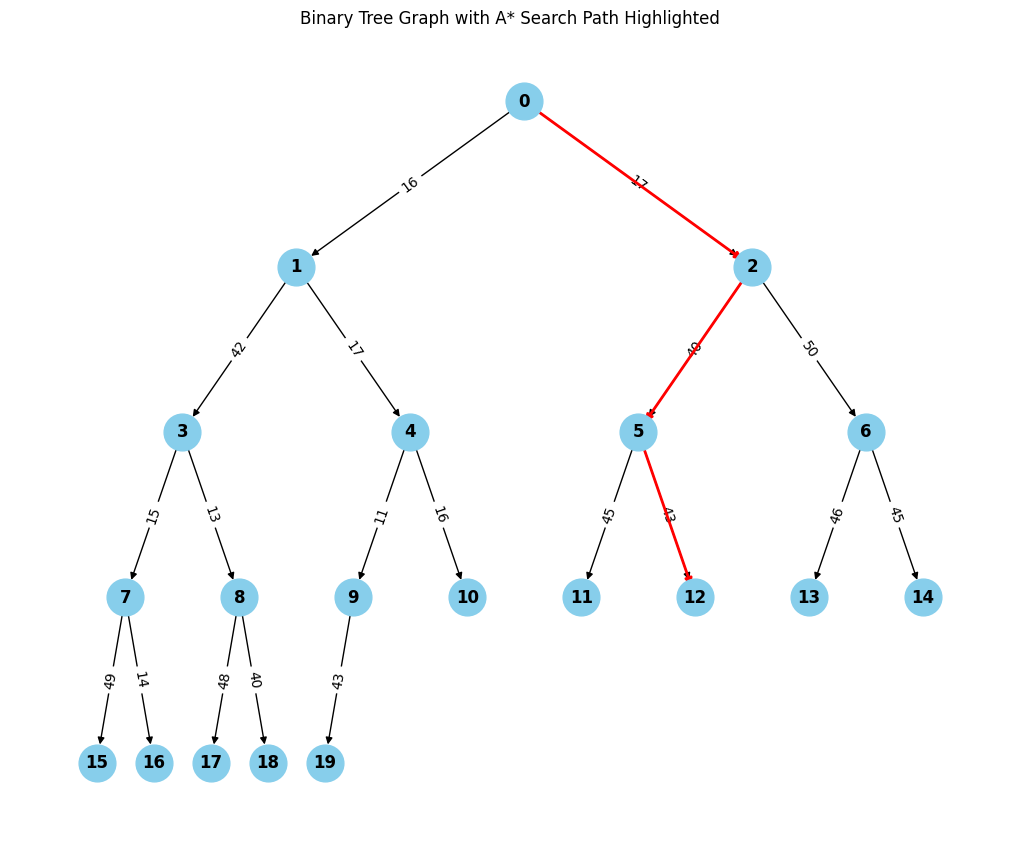

Path found by A* search from node 0 to node 12: [0, 2, 5, 12]


In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_binary_tree(nodes):
    G = nx.DiGraph()  # Use a directed graph to represent parent-child relationships
    for i in range(nodes):
        left_child = 2 * i + 1
        right_child = 2 * i + 2
        if left_child < nodes:
            weight = random.randint(10, 50)  # Assign a random weight between 10 and 50
            G.add_edge(i, left_child, weight=weight)
        if right_child < nodes:
            weight = random.randint(10, 50)  # Assign a random weight between 10 and 50
            G.add_edge(i, right_child, weight=weight)
    return G

def hierarchical_layout(G, root=0, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = {root: (xcenter, vert_loc)}

    def add_edges(node, x, y, dx):
        neighbors = list(G.neighbors(node))
        if neighbors:
            next_x = x - dx / 2
            for neighbor in neighbors:
                pos[neighbor] = (next_x, y - vert_gap)
                add_edges(neighbor, next_x, y - vert_gap, dx / 2)
                next_x += dx

    add_edges(root, xcenter, vert_loc, width)
    return pos

def draw_graph(G, path=None):
    pos = hierarchical_layout(G, root=0, width=1.0, vert_gap=0.2, vert_loc=1, xcenter=0.5)  # Root at the center top
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold", edge_color="black")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path:
        # Highlight the path found by A* search
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Binary Tree Graph with A* Search Path Highlighted")
    plt.show()

def heuristic(u, v):
    # For simplicity, use a zero heuristic (Dijkstra's algorithm)
    return 0

def perform_a_star_search(G, start, goal):
    # Perform A* search using NetworkX
    path = nx.astar_path(G, source=start, target=goal, weight='weight', heuristic=heuristic)
    return path

# Generate a binary tree with 20 nodes and random weights
binary_tree = generate_binary_tree(nodes=20)

# Define start and goal nodes for A* search
start_node = 0
goal_node = 12  # Target node

# Perform A* search
path = perform_a_star_search(binary_tree, start_node, goal_node)

# Visualize the graph with the path highlighted
draw_graph(binary_tree, path=path)

print(f"Path found by A* search from node {start_node} to node {goal_node}: {path}")